In [97]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

# reade data

In [98]:
wor2idx=tf.keras.datasets.imdb.get_word_index() # changed imbd to imdb
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.imdb.load_data()

In [99]:
x_train[0][0]

1

In [100]:
idx2word={wor2idx[word]:word for word in wor2idx}

In [101]:
idx2word[1]

'the'

In [102]:
# convert wob to text
def  return_t(tokens):
  text=[]
  for i in tokens:
    text.append(idx2word[i])
  return " ".join(text)
return_t(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room titillate it so heart shows to years of every never going villaronga help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of gilmore's br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but wh

In [103]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [104]:
max_len=0
for i in x_train:
  max_len=max(max_len,len(i))
max_len

2494

In [105]:
# 2494 is soo big then we write 100
# if more that 100 then cut it to fist 100 word
# and if less than 100 then add padding to it
# max_len=100
# x_train_padded=tf.keras.preprocessing.sequence.pad_sequences(x_train,maxlen=max_len).astype(np.float64)
# x_test_padded=tf.keras.preprocessing.sequence.pad_sequences(x_test,maxlen=max_len).astype(np.float64)

In [106]:
x_train_padded = np.zeros((x_train.shape[0], max_len))
for i, sent in enumerate(x_train):
    x_train_padded[i, :len(sent)] = sent[:max_len]
x_test_padded = np.zeros((x_test.shape[0], max_len))
for i, sent in enumerate(x_test):
    x_test_padded[i, :len(sent)] = sent[:max_len]
x_test_padded.shape

(25000, 2494)

In [107]:
# np.array_equal(xx,x_train_padded)
# are_close = np.allclose(xx,x_train_padded)
# print(are_close)


In [108]:
# print(xx.dtype, x_train_padded.dtype)


In [109]:
print(x_train_padded.shape)

(25000, 2494)


# RNN model

In [110]:
len(wor2idx)


88584

In [111]:
max(wor2idx.values())

88584

In [112]:
vocab_size=len(wor2idx)

In [113]:
vocab_size

88584

In [114]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [115]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [116]:
history = model.fit(x_train_padded, y_train, epochs=5, batch_size=128,
                    validation_data=(x_test_padded, y_test),
                    validation_steps=30)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 57s 272ms/step - accuracy: 0.4972 - loss: 0.6958 - val_accuracy: 0.4896 - val_loss: 0.6943
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 79s 261ms/step - accuracy: 0.5027 - loss: 0.6962 - val_accuracy: 0.5039 - val_loss: 0.6998
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 51s 261ms/step - accuracy: 0.5065 - loss: 0.6986 - val_accuracy: 0.4992 - val_loss: 0.6936
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 83s 263ms/step - accuracy: 0.5021 - loss: 0.6965 - val_accuracy: 0.5003 - val_loss: 0.6935
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 52s 267ms/step - accuracy: 0.5034 - loss: 0.6953 - val_accuracy: 0.5094 - val_loss: 0.6930


In [117]:
test_loss, test_acc = model.evaluate(x_test_padded, y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.5154 - loss: 0.6928
Test Loss: 0.6933472752571106
Test Accuracy: 0.508679986000061


In [118]:
!pip install pydot graphviz


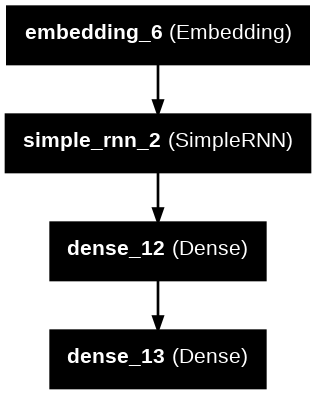

In [119]:
tf.keras.utils.plot_model(
    model, show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

# RNN_bi Model

In [120]:
model_RNN_Bi = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [121]:
model_RNN_Bi.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [122]:
history = model_RNN_Bi.fit(x_train_padded, y_train, epochs=5, batch_size=128,
                    validation_data=(x_test_padded, y_test),
                    validation_steps=30)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.5158 - loss: 0.6963 - val_accuracy: 0.5974 - val_loss: 0.6655
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.6803 - loss: 0.5940 - val_accuracy: 0.6221 - val_loss: 0.6474
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.7339 - loss: 0.5329 - val_accuracy: 0.6560 - val_loss: 0.6431
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.8359 - loss: 0.3883 - val_accuracy: 0.7693 - val_loss: 0.5090
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.8857 - loss: 0.2829 - val_accuracy: 0.7612 - val_loss: 0.6370


In [123]:
test_loss, test_acc = model_RNN_Bi.evaluate(x_test_padded, y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 269s 343ms/step - accuracy: 0.7589 - loss: 0.6360
Test Loss: 0.6363174319267273
Test Accuracy: 0.7605599761009216


In [124]:
!pip install pydot graphviz


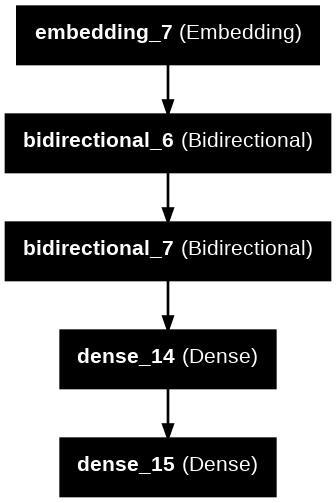

In [125]:
tf.keras.utils.plot_model(
    model_RNN_Bi, show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

# GRU_BI Model

In [126]:
model_GRU_Bi = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [127]:
model_GRU_Bi.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [128]:
history = model_GRU_Bi.fit(x_train_padded, y_train, epochs=5, batch_size=128,
                    validation_data=(x_test_padded, y_test),
                    validation_steps=30)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 86s 406ms/step - accuracy: 0.6171 - loss: 0.6256 - val_accuracy: 0.7820 - val_loss: 0.4944
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 81s 400ms/step - accuracy: 0.8763 - loss: 0.3215 - val_accuracy: 0.8219 - val_loss: 0.3991
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 77s 393ms/step - accuracy: 0.9523 - loss: 0.1490 - val_accuracy: 0.8164 - val_loss: 0.4924
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 83s 396ms/step - accuracy: 0.9731 - loss: 0.0821 - val_accuracy: 0.8484 - val_loss: 0.4275
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 82s 396ms/step - accuracy: 0.9845 - loss: 0.0476 - val_accuracy: 0.8396 - val_loss: 0.5013


In [129]:
test_loss, test_acc = model_GRU_Bi.evaluate(x_test_padded, y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 127ms/step - accuracy: 0.8387 - loss: 0.5342
Test Loss: 0.5359376072883606
Test Accuracy: 0.836359977722168


In [130]:
!pip install pydot graphviz


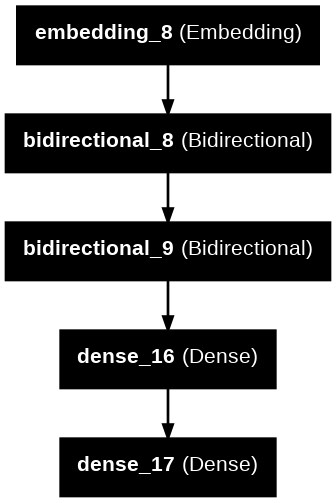

In [131]:
tf.keras.utils.plot_model(
    model_GRU_Bi, show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [132]:
model_GRU_Bi = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [133]:
model_GRU_Bi.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [134]:
history = model_GRU_Bi.fit(x_train_padded, y_train, epochs=5, batch_size=128,
                    validation_data=(x_test_padded, y_test),
                    validation_steps=30)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 88s 409ms/step - accuracy: 0.6057 - loss: 0.6320 - val_accuracy: 0.8227 - val_loss: 0.4349
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 80s 398ms/step - accuracy: 0.8920 - loss: 0.2777 - val_accuracy: 0.8117 - val_loss: 0.4547
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 82s 397ms/step - accuracy: 0.9415 - loss: 0.1653 - val_accuracy: 0.8161 - val_loss: 0.5467
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 83s 402ms/step - accuracy: 0.9641 - loss: 0.1029 - val_accuracy: 0.8380 - val_loss: 0.5077
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 81s 398ms/step - accuracy: 0.9847 - loss: 0.0511 - val_accuracy: 0.8393 - val_loss: 0.5479


In [135]:
test_loss, test_acc = model_GRU_Bi.evaluate(x_test_padded, y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 121ms/step - accuracy: 0.8322 - loss: 0.5796
Test Loss: 0.5864056944847107
Test Accuracy: 0.8299599885940552


In [136]:
!pip install pydot graphviz


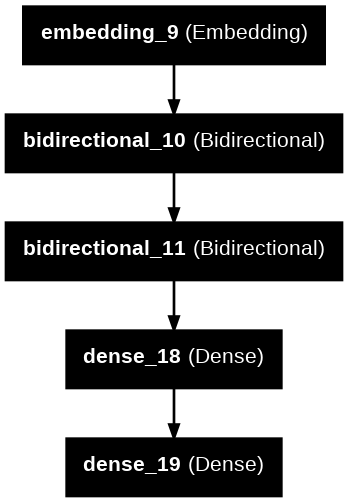

In [137]:
tf.keras.utils.plot_model(
    model_GRU_Bi, show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

# LSTM_BI Model

In [138]:
max_len=0
for i in x_train:
  max_len=max(max_len,len(i))
max_len

2494

In [139]:
x_train_padded = np.zeros((x_train.shape[0], max_len))
for i, sent in enumerate(x_train):
    x_train_padded[i, :len(sent)] = sent[:max_len]
x_test_padded = np.zeros((x_test.shape[0], max_len))
for i, sent in enumerate(x_test):
    x_test_padded[i, :len(sent)] = sent[:max_len]
x_test_padded.shape

(25000, 2494)

In [140]:
model_LSTM_Bi = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [141]:
model_LSTM_Bi.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [142]:
history = model_LSTM_Bi.fit(x_train_padded, y_train, epochs=5, batch_size=128,
                    validation_data=(x_test_padded, y_test),
                    validation_steps=30)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 50s 230ms/step - accuracy: 0.6490 - loss: 0.5906 - val_accuracy: 0.8148 - val_loss: 0.4590
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 207ms/step - accuracy: 0.8951 - loss: 0.2730 - val_accuracy: 0.8604 - val_loss: 0.3612
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 203ms/step - accuracy: 0.9561 - loss: 0.1366 - val_accuracy: 0.8500 - val_loss: 0.4222
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 208ms/step - accuracy: 0.9754 - loss: 0.0815 - val_accuracy: 0.8500 - val_loss: 0.5257
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 203ms/step - accuracy: 0.9800 - loss: 0.0642 - val_accuracy: 0.8404 - val_loss: 0.6343


In [143]:
test_loss, test_acc = model_LSTM_Bi.evaluate(x_test_padded, y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.8314 - loss: 0.6862
Test Loss: 0.6975435018539429
Test Accuracy: 0.8289999961853027


# let's save the moel


## work in both direction?

In [144]:
model_GRU_Bi.save('model_GRU_Bi.h5')
model_LSTM_Bi.save('model_LSTM_Bi.h5')
model.save('model.h5')

## how can we predict an input given models

In [145]:
import tensorflow as tf
import numpy as np
rnn_padding=100
lstm_padding=2494
word2idx = tf.keras.datasets.imdb.get_word_index()
rnn=tf.keras.models.load_model('model.h5')
rnn_bi=tf.keras.models.load_model('model_GRU_Bi.h5')
lstm=tf.keras.models.load_model('model_LSTM_Bi.h5')
gru=tf.keras.models.load_model('model_GRU_Bi.h5')

In [146]:
def predict(text, clf, word2idx, padding_size):
    # padd the text
    padded_text = np.zeros((padding_size))
    # transform your text into indices
    padded_text[:min(padding_size, len(text.split()))] = [
        word2idx.get(word, 0) for word in text.split()][:padding_size]
    # predict it !
    prediction = clf.predict(tf.expand_dims(padded_text, 0))
    return prediction

In [147]:
text= "the movie was super awesome!\
although i didn't like the fact that this piece of shit called star lord destroyed the \
whole mission, i wish they don't include him in the upcoming movies really."

In [148]:
predict(text, rnn, word2idx, rnn_padding)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


array([[0.48922464]], dtype=float32)

In [149]:
predict(text, lstm, word2idx, lstm_padding)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


array([[0.187553]], dtype=float32)

In [150]:
predict(text, gru, word2idx, rnn_padding)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


array([[0.9969844]], dtype=float32)

In [152]:
# In this notebook we have seen a brief on the recurrent neural networks, how they work and how to deal with sequences using them.

# We have seen that RNN are much more efficient in working with sequences because they learn the knowledge embedded in the sequence unlike feed forward network.

# We also discussed how GRU is better than RNN in two main points, the way it handles the memory and also the vanishing gradient handling.

# Finally we have seen the LSTM and how it adds more gates to learn more about the sequence and enable a long term memory besides the short term, thus can work with larger sequences.

# Thank You 🥰🥰🥰